# Decision Tree Classifier using Entropy

Decision tree learning is the construction of a decision tree from class-labeled training tuples. A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node.

Information gain based on Entropy is one measure to decide which attribute has to be used for splitting the node.

Let there be $J$  classes.

Let $ p_i $  be the probabilities of items with class label $i$.


Entropy is defined as $$ H(T) = I_E(p_1, p_2, \ldots, p_J) =  \sum_{i=1}^J (-1) p_i \log_2 p_i $$

Information gain is defined as $$ IG(T,a) = H(T) - H(T \vert a) $$

The Zoo dataset (https://www.kaggle.com/uciml/zoo-animal-classification)

This dataset consists of 101 animals from a zoo.

There are 16 features or attributes with various traits to describe the animals: animal_name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone,     breathes, venomous, fins, legs, tail, domestic, catsize.

The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

The purpose for this dataset is to be able to predict the classification of the animals, based upon the attributes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')

## 1. Import the dataset and verify

In [ ]:
# Import the dataset ( Zoo dataset downloaded from Kaggle)

import pandas as pd

dataset = pd.read_csv('zoo.csv')

dataset.shape

(101, 18)

In [ ]:
# view first few rows of the dataset

dataset.head()

# Class Number	Count	Class Name
# 1	41	Mammal
# 2	20	Bird
# 3	5	Reptile
# 4	13	Fish
# 5	4	Amphibian
# 6	8	Bug
# 7	10	Invertebrate

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 2. Pre-processing

In [ ]:
# Drop the first column which are the animal names

dataset=dataset.drop('animal_name',axis=1) # column

# view first few rows of the dataset again

dataset.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# Split the dataset into training and testing set
# Split data into training and testing sets

X = dataset.iloc[:, :-1] # extract all rows, all column except for the last column.
y = dataset.iloc[:,-1]  # extract all rows but the last column

print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.25, stratify = y)


print('Training Features :', X_train.shape)
print('Training Labels :', y_train.shape)
print('Testing Features :', X_test.shape)
print('Testing Labels :', y_test.shape)


(101, 16)
(101,)
Training Features : (75, 16)
Training Labels : (75,)
Testing Features : (26, 16)
Testing Labels : (26,)


## 3. Build and train the model

In [ ]:
# Import the classifier from library

from sklearn.tree import DecisionTreeClassifier

# Train the classifier using Entrooy

tree = DecisionTreeClassifier(criterion = 'entropy')

tree.fit(X_train, y_train) # for training

DecisionTreeClassifier(criterion='entropy')

## 4. Make predictions

In [ ]:
# Predict the values for testing set

y_predict = tree.predict(X_test)

In [ ]:
print(y_predict)

[3 2 4 1 1 4 2 2 1 7 1 1 6 1 6 1 3 1 4 1 7 1 2 1 3 2]


## 5. Performance Measures

In [ ]:
# Accuracy of the classifier

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_predict)
print(acc * 100 , "%")

92.3076923076923 %


In [ ]:
# build the confusion matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predict)
print('Confusion Matrix :')
print(conf_matrix)

Confusion Matrix :
[[11  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  2]]


In [ ]:
# Classification Report - precision, recall

from sklearn.metrics import classification_report

print('Classification Report: ')
print(classification_report(y_test, y_predict))

# Precision is the positive predictive value -- no: of observations correctly labeled
# as belonging to positive class to total no: of observations  of postive class

# Recall -- number of true positives divided by the total no: of observations of positive class

# F1 score = 2 * (precision * recall) / (precision + recall)

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       0.33      1.00      0.50         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3

    accuracy                           0.92        26
   macro avg       0.76      0.81      0.76        26
weighted avg       0.94      0.92      0.92        26



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6. Visualizing the tree

In [ ]:
dataset.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# extract the column or feature names and store as a list

feature_names = list(dataset.columns.values)

feature_names = feature_names[:-1]
print(feature_names)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [ ]:
# extract the class names and store as a list

class_int = dataset['class_type'].unique().tolist()
print(class_int)
class_names = ['Mammal', 'Fish', 'Bird', 'Invertebrate', 'Bug', 'Amphibian', 'Reptile']

# one-one mapping between class names and the int value used in the dataset

dictionary = dict(zip(class_names, class_int))
print(dictionary)
# 1	41	Mammal
# 2	20	Bird
# 3	5	Reptile
# 4	13	Fish
# 5	4	Amphibian
# 6	8	Bug
# 7	10	Invertebrate

[1, 4, 2, 7, 6, 5, 3]
{'Mammal': 1, 'Fish': 4, 'Bird': 2, 'Invertebrate': 7, 'Bug': 6, 'Amphibian': 5, 'Reptile': 3}


In [ ]:
#!pip install pydotplus
#!pip install python-graphviz
#!pip install six

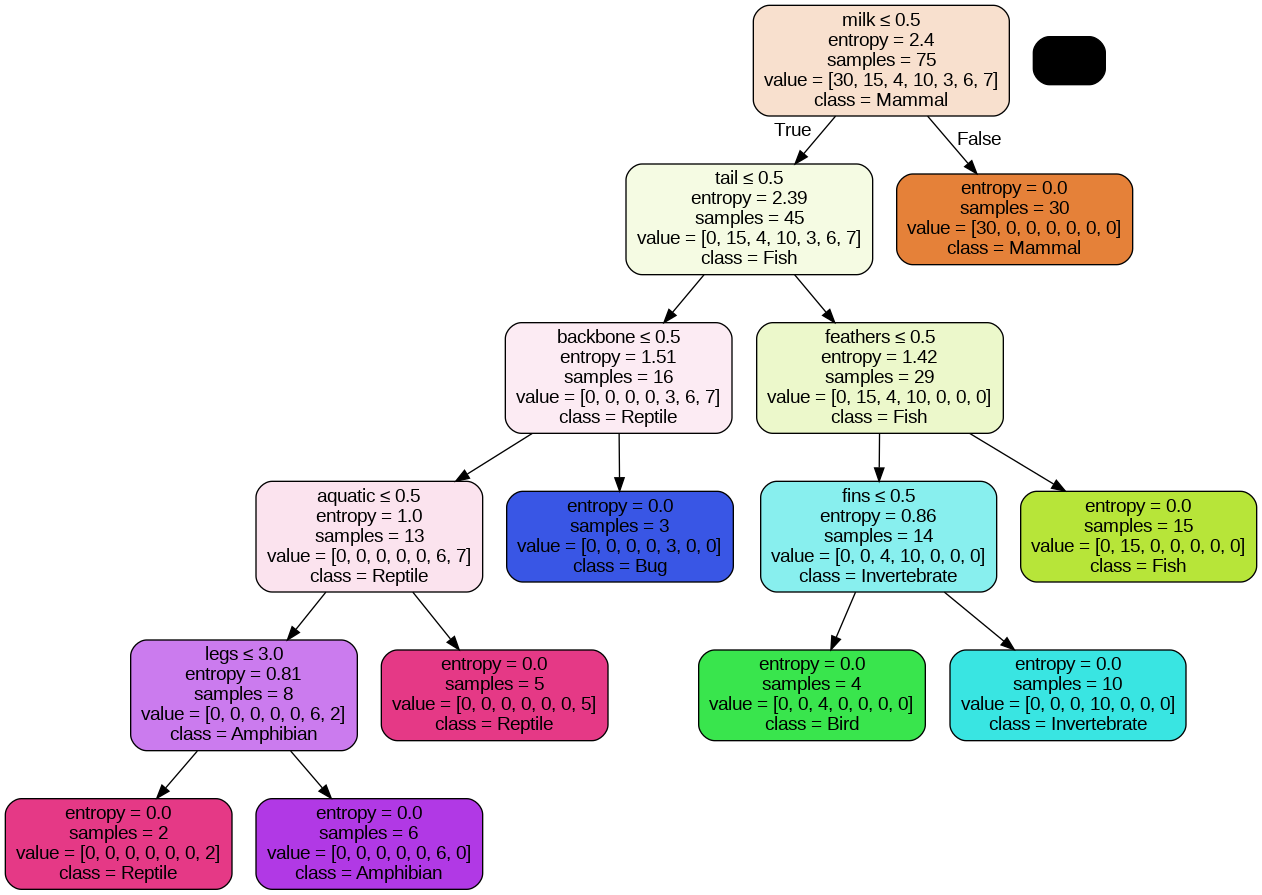

In [ ]:
# Vizualize the tree

# set the path to graphviz
#import os  # Windows OS
#os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz' # Windows OS
from six import StringIO
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = feature_names,
                class_names = class_names,
                proportion = False, precision = 2,
                special_characters=True)

import pydotplus

# may need to install
# conda install -c conda-forge pydotplus

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

from IPython.display import Image
Image(graph.create_png())
# inside node , samples : no of samples that node comtains. value  are class frequencies.


## 7. Prune the tree

In [ ]:
tree_prune = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

tree_prune.fit(X_train, y_train)

y_pruned = tree.predict(X_test)


In [ ]:
print(accuracy_score(y_test, y_pruned) * 100 , "%")

92.3076923076923 %


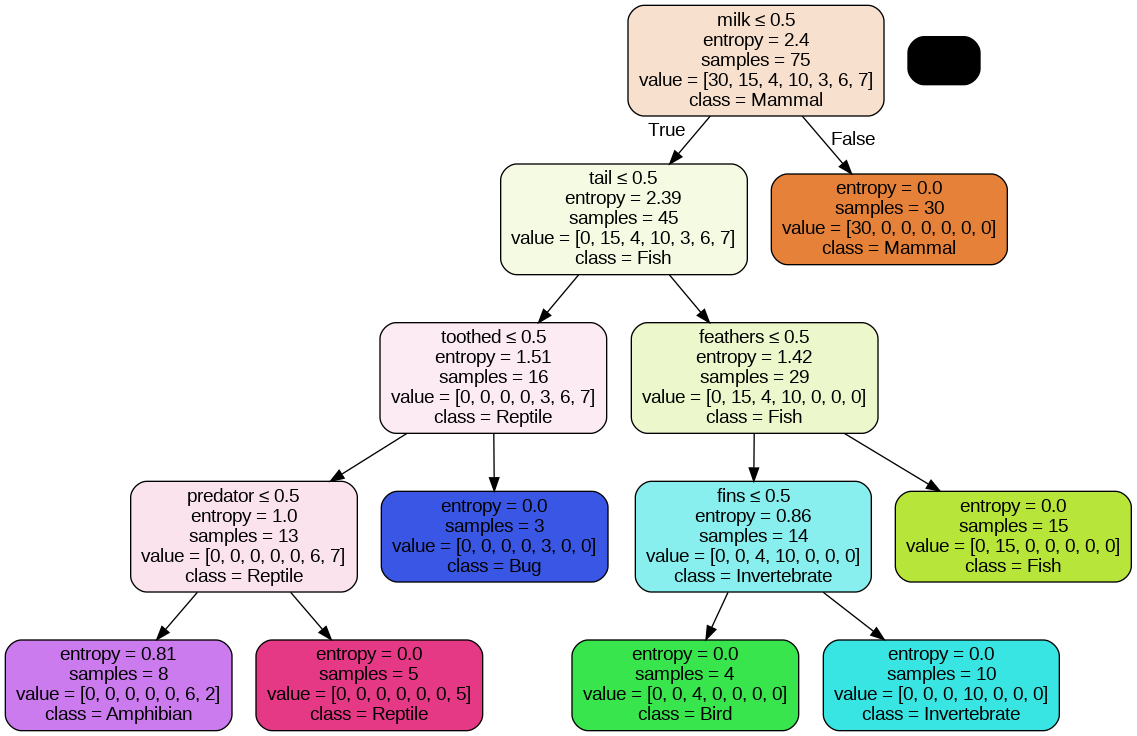

In [ ]:
#os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz'

dot_data_pruned = StringIO()

export_graphviz(tree_prune, out_file=dot_data_pruned,
                filled=True, rounded=True,
                feature_names = feature_names,
                class_names = class_names,
                proportion = False, precision = 2,
                special_characters=True)

graph_pruned = pydotplus.graph_from_dot_data(dot_data_pruned.getvalue())

Image(graph_pruned.create_png())